In [1]:
import copy

# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.parsers import HMParser

import glob

In [2]:
# Data parsing

parsed_data = HMParser(file_path='/Users/ecgomes/DataspellProjects/pyecom/data/EC_V4.xlsx', ec_id=1)
parsed_data.parse()

In [3]:
# Load the data

data_mgo = []
for run in np.sort(glob.glob('paper_results_v2/mgo*')):
    temp_run = {}
    for item in glob.glob(run + '/*.csv'):
        temp_name = item.split('/')[-1].split('.')[0]
        temp_run[temp_name] = pd.read_csv(item, index_col=0)
    data_mgo.append(temp_run)
    
data_do = []
for run in np.sort(glob.glob('paper_results_v2/do*')):
    temp_run = {}
    for item in glob.glob(run + '/*.csv'):
        temp_name = item.split('/')[-1].split('.')[0]
        temp_run[temp_name] = pd.read_csv(item, index_col=0)
    data_do.append(temp_run)
    
data_hydedf = []
for run in np.sort(glob.glob('paper_results_v2/hyde*')):
    temp_run = {}
    for item in glob.glob(run + '/*.csv'):
        temp_name = item.split('/')[-1].split('.')[0]
        temp_run[temp_name] = pd.read_csv(item, index_col=0)
    data_hydedf.append(temp_run)
    
data_de = []
for run in np.sort(glob.glob('paper_results_v2/de*')):
    temp_run = {}
    for item in glob.glob(run + '/*.csv'):
        temp_name = item.split('/')[-1].split('.')[0]
        temp_run[temp_name] = pd.read_csv(item, index_col=0)
    data_de.append(temp_run)
    
data_ga = []
for run in np.sort(glob.glob('paper_results_v2/ga*')):
    temp_run = {}
    for item in glob.glob(run + '/*.csv'):
        temp_name = item.split('/')[-1].split('.')[0]
        temp_run[temp_name] = pd.read_csv(item, index_col=0)
    data_ga.append(temp_run)
    
data_pso = []
for run in np.sort(glob.glob('paper_results_v2/pso*')):
    temp_run = {}
    for item in glob.glob(run + '/*.csv'):
        temp_name = item.split('/')[-1].split('.')[0]
        temp_run[temp_name] = pd.read_csv(item, index_col=0)
    data_pso.append(temp_run)

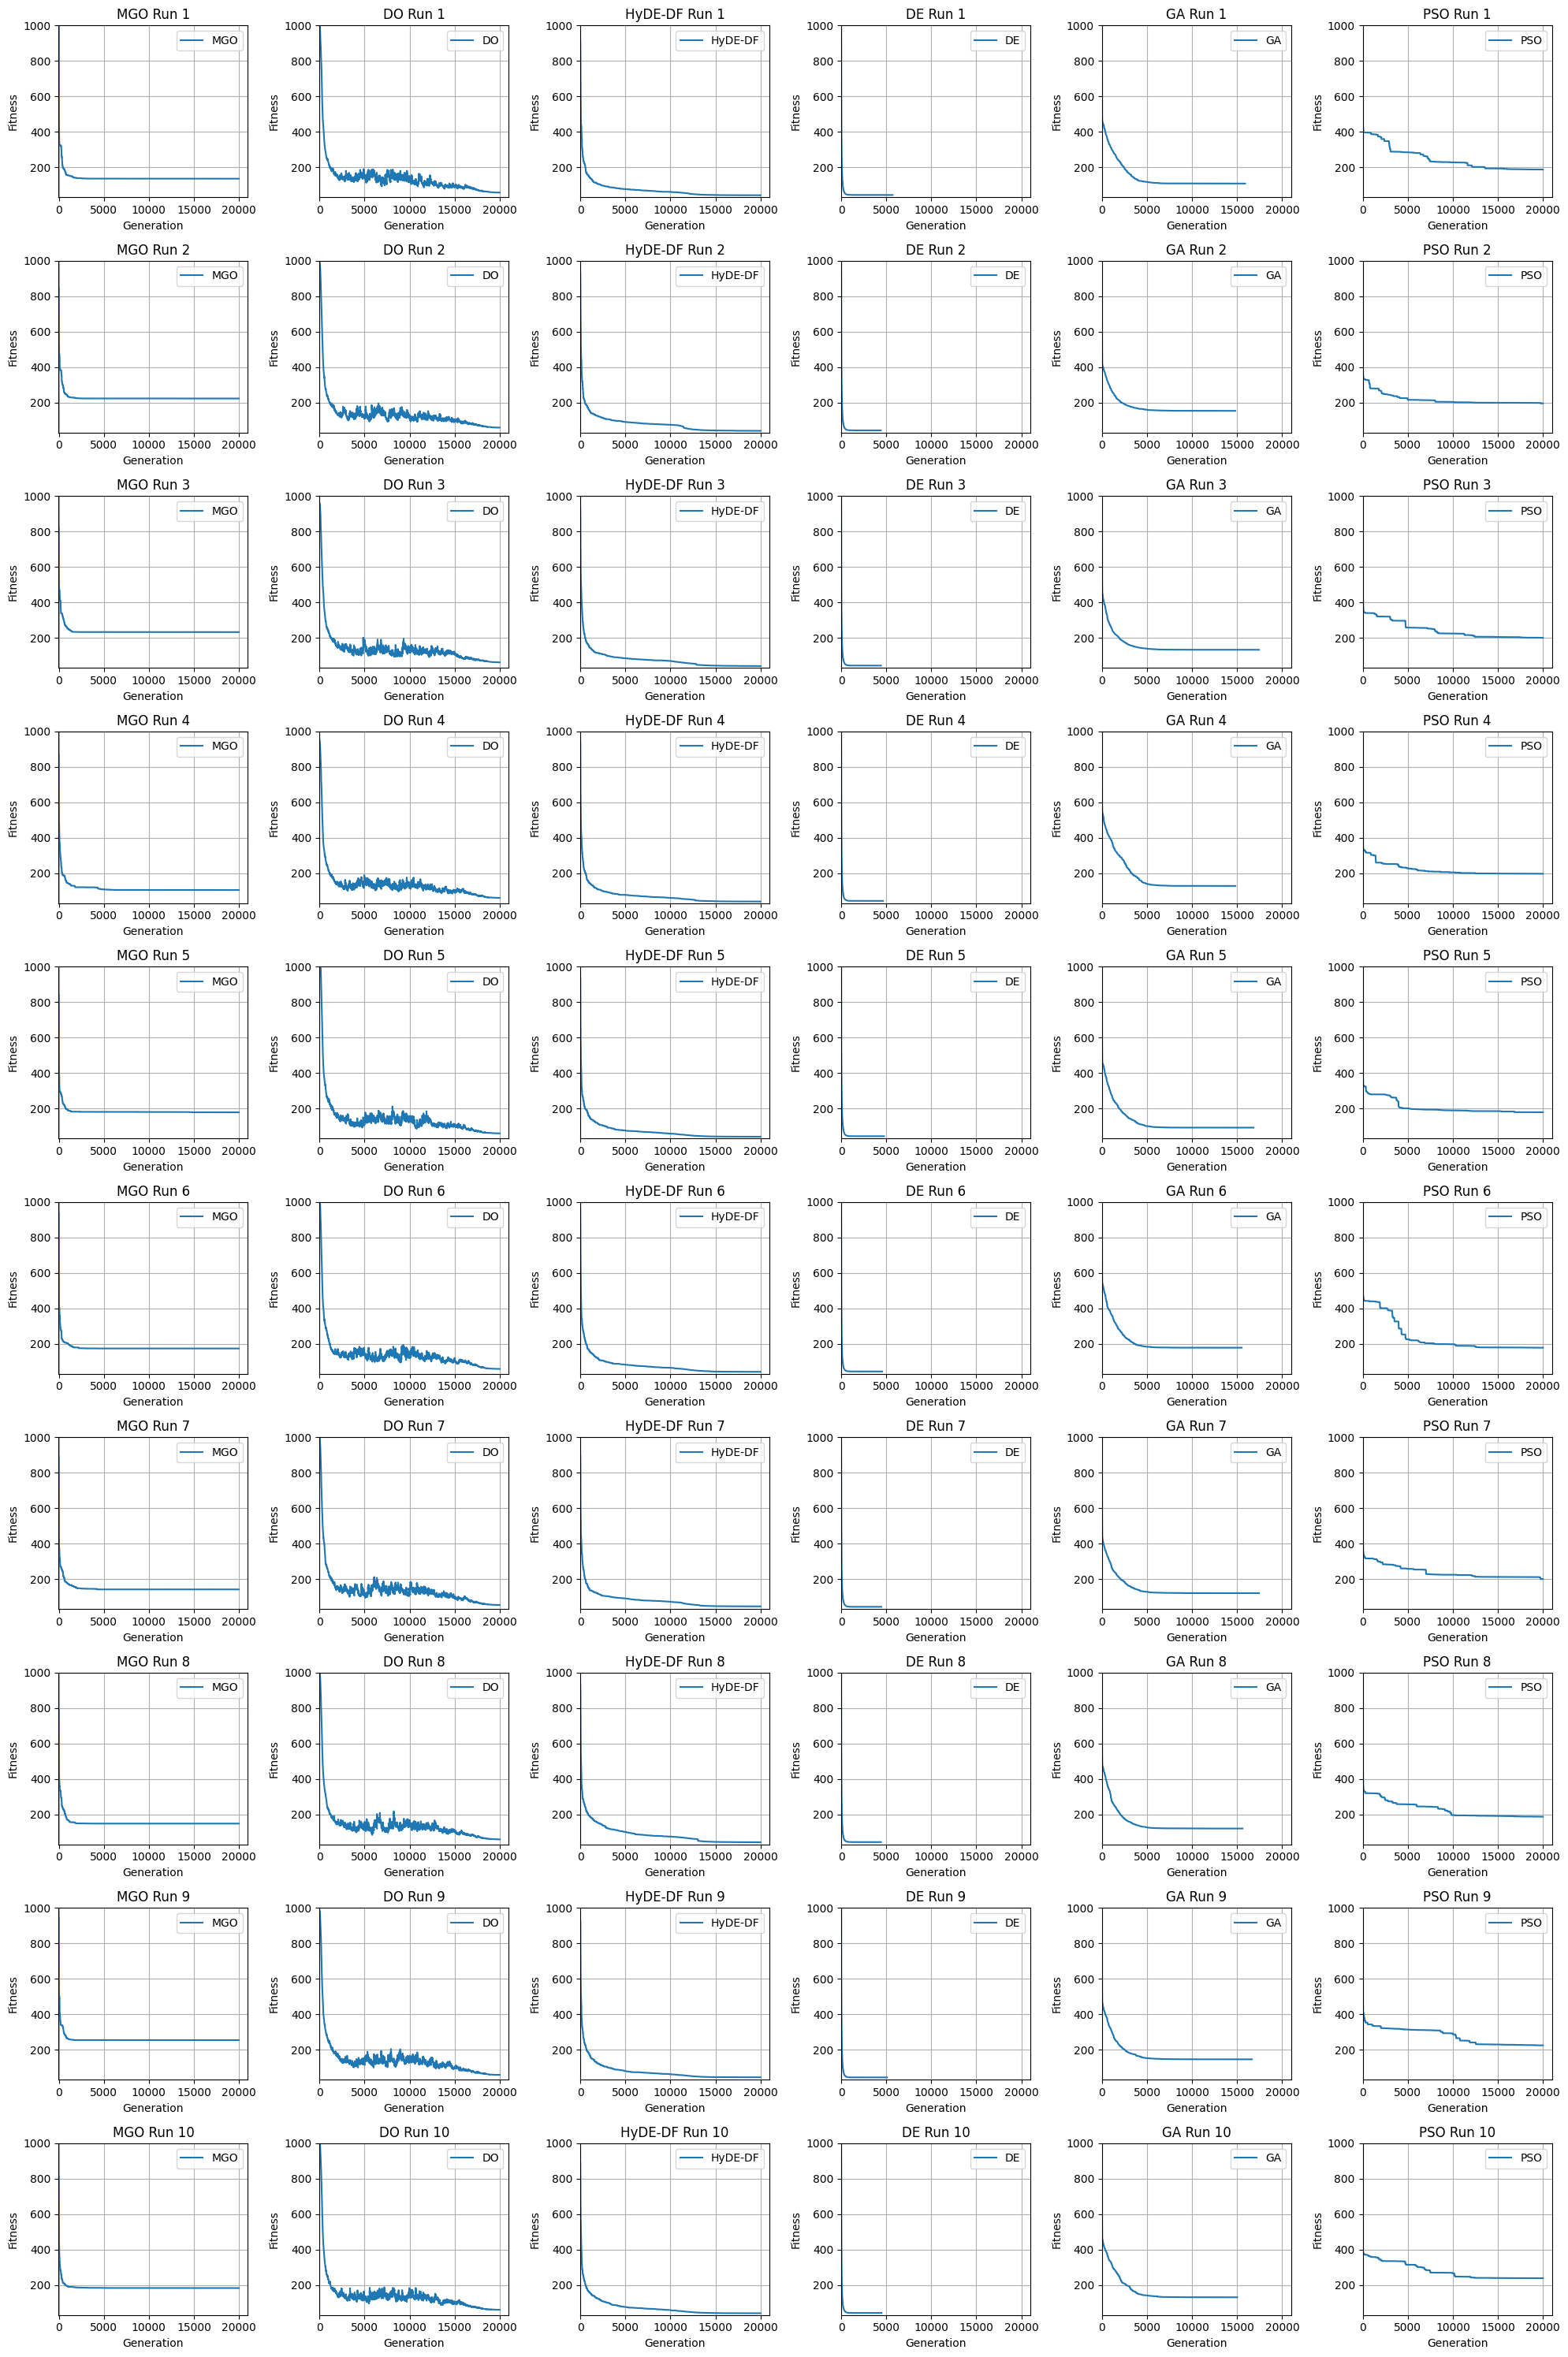

In [4]:
# Plot the fitness evolution for the different runs and algorithms

fig, ax = plt.subplots(10, 6, figsize=(20, 30))

# Go through each row
for i in range(10):
        
    # Plot the data
    ax[i, 0].plot(data_mgo[i]['fitness_evolution'], label='MGO')
    ax[i, 1].plot(data_do[i]['fitness_evolution'], label='DO')
    ax[i, 2].plot(data_hydedf[i]['fitness_evolution'], label='HyDE-DF')
    ax[i, 3].plot(data_de[i]['fitness_evolution'], label='DE')
    ax[i, 4].plot(data_ga[i]['fitness_evolution'], label='GA')
    ax[i, 5].plot(data_pso[i]['fitness_evolution'], label='PSO')
    
    # Set the title
    ax[i, 0].set_title('MGO Run ' + str(i + 1))
    ax[i, 1].set_title('DO Run ' + str(i + 1))
    ax[i, 2].set_title('HyDE-DF Run ' + str(i + 1))
    ax[i, 3].set_title('DE Run ' + str(i + 1))
    ax[i, 4].set_title('GA Run ' + str(i + 1))
    ax[i, 5].set_title('PSO Run ' + str(i + 1))
    
    for j in range(6):            
        # Set the legend
        ax[i, j].legend()
            
        # Set the x-axis label
        ax[i, j].set_xlabel('Generation')
            
        # Set the y-axis label
        ax[i, j].set_ylabel('Fitness')
        
        # Set the Y-axis lower limit
        ax[i, j].set_ylim(30, 1000)
        
        # Set the X-axis limit
        ax[i, j].set_xlim(-10, 21000)
            
        # Set the grid
        ax[i, j].grid()
        
plt.tight_layout()

# plt.savefig('fitness_evolution.svg')

plt.show()

In [5]:
# Best fitness for each run

df_time = pd.DataFrame(columns=['MGO', 'DO', 'HyDE-DF', 'DE', 'GA', 'PSO'])
df_fitness = pd.DataFrame(columns=['MGO', 'DO', 'HyDE-DF', 'DE', 'GA', 'PSO'])
df_iterations = pd.DataFrame(columns=['MGO', 'DO', 'HyDE-DF', 'DE', 'GA', 'PSO'])
df_epochs = pd.DataFrame(columns=['MGO', 'DO', 'HyDE-DF', 'DE', 'GA', 'PSO'])

for i in range(10):
    df_time.loc[i] = [data_mgo[i]['fitness']['time'].iloc[-1], 
                      data_do[i]['fitness']['time'].iloc[-1], 
                      data_hydedf[i]['fitness']['time'].iloc[-1],
                      data_de[i]['fitness']['time'].iloc[-1],
                      data_ga[i]['fitness']['time'].iloc[-1],
                      data_pso[i]['fitness']['time'].iloc[-1]]
    df_fitness.loc[i] = [data_mgo[i]['fitness']['best_fitness'].iloc[-1], 
                         data_do[i]['fitness']['best_fitness'].iloc[-1], 
                         data_hydedf[i]['fitness']['best_fitness'].iloc[-1],
                         data_de[i]['fitness']['best_fitness'].iloc[-1],
                         data_ga[i]['fitness']['best_fitness'].iloc[-1],
                         data_pso[i]['fitness']['best_fitness'].iloc[-1]]
    df_iterations.loc[i] = [len(data_mgo[i]['fitness_evolution']) / data_mgo[i]['fitness']['time'].iloc[-1], 
                            len(data_do[i]['fitness_evolution']) / data_do[i]['fitness']['time'].iloc[-1], 
                            len(data_hydedf[i]['fitness_evolution']) / data_hydedf[i]['fitness']['time'].iloc[-1],
                            len(data_de[i]['fitness_evolution']) / data_de[i]['fitness']['time'].iloc[-1],
                            len(data_ga[i]['fitness_evolution']) / data_ga[i]['fitness']['time'].iloc[-1],
                            len(data_pso[i]['fitness_evolution']) / data_pso[i]['fitness']['time'].iloc[-1]]
    df_epochs.loc[i] = [len(data_mgo[i]['fitness_evolution']),
                        len(data_do[i]['fitness_evolution']),
                        len(data_hydedf[i]['fitness_evolution']),
                        len(data_de[i]['fitness_evolution']),
                        len(data_ga[i]['fitness_evolution']),
                        len(data_pso[i]['fitness_evolution'])]
    
# Add the mean and std
df_time = pd.concat([df_time, pd.DataFrame(df_time.mean(), columns=['Mean']).T])
df_time = pd.concat([df_time, pd.DataFrame(df_time.std(), columns=['Std']).T])

df_iterations = pd.concat([df_iterations, pd.DataFrame(df_iterations.mean(), columns=['Mean']).T])
df_iterations = pd.concat([df_iterations, pd.DataFrame(df_iterations.std(), columns=['Std']).T])

df_fitness = pd.concat([df_fitness, pd.DataFrame(df_fitness.mean(), columns=['Mean']).T])
df_fitness = pd.concat([df_fitness, pd.DataFrame(df_fitness.std(), columns=['Std']).T])

df_epochs = pd.concat([df_epochs, pd.DataFrame(df_epochs.mean(), columns=['Mean']).T])
df_epochs = pd.concat([df_epochs, pd.DataFrame(df_epochs.std(), columns=['Std']).T])

In [6]:
# Get the minimum fitness for each algorithm

min_fitness = pd.DataFrame(columns=['MGO', 'DO', 'HyDE-DF', 'DE', 'GA', 'PSO'])
min_fitness.loc['Fitness'] = [df_fitness[:10]['MGO'].min(), 
                              df_fitness[:10]['DO'].min(), 
                              df_fitness[:10]['HyDE-DF'].min(),
                              df_fitness[:10]['DE'].min(),
                              df_fitness[:10]['GA'].min(),
                              df_fitness[:10]['PSO'].min()]
min_fitness.loc['Time'] = [df_time[:10]['MGO'].loc[df_fitness[:10]['MGO'].argmin()],
                           df_time[:10]['DO'].loc[df_fitness[:10]['DO'].argmin()],
                           df_time[:10]['HyDE-DF'].loc[df_fitness[:10]['HyDE-DF'].argmin()],
                           df_time[:10]['DE'].loc[df_fitness[:10]['DE'].argmin()],
                           df_time[:10]['GA'].loc[df_fitness[:10]['GA'].argmin()],
                           df_time[:10]['PSO'].loc[df_fitness[:10]['PSO'].argmin()]]

min_fitness.loc['Run'] = [df_fitness[:10]['MGO'].argmin(), 
                          df_fitness[:10]['DO'].argmin(), 
                          df_fitness[:10]['HyDE-DF'].argmin(),
                          df_fitness[:10]['DE'].argmin(),
                          df_fitness[:10]['GA'].argmin(),
                          df_fitness[:10]['PSO'].argmin()]

min_fitness.loc['Iterations'] = [df_iterations[:10]['MGO'].loc[df_fitness[:10]['MGO'].argmin()],
                                 df_iterations[:10]['DO'].loc[df_fitness[:10]['DO'].argmin()],
                                 df_iterations[:10]['HyDE-DF'].loc[df_fitness[:10]['HyDE-DF'].argmin()],
                                 df_iterations[:10]['DE'].loc[df_fitness[:10]['DE'].argmin()],
                                 df_iterations[:10]['GA'].loc[df_fitness[:10]['GA'].argmin()],
                                 df_iterations[:10]['PSO'].loc[df_fitness[:10]['PSO'].argmin()]]

# Transpose the DF to be able to convert runs to integers
min_fitness = min_fitness.T
min_fitness['Run'] = min_fitness['Run'].astype(int)

In [7]:
# Now the worst fitness for each algorithm

max_fitness = pd.DataFrame(columns=['MGO', 'DO', 'HyDE-DF', 'DE', 'GA', 'PSO'])
max_fitness.loc['Fitness'] = [df_fitness[:10]['MGO'].max(), 
                              df_fitness[:10]['DO'].max(), 
                              df_fitness[:10]['HyDE-DF'].max(),
                              df_fitness[:10]['DE'].max(),
                              df_fitness[:10]['GA'].max(),
                              df_fitness[:10]['PSO'].max()]

max_fitness.loc['Time'] = [df_time[:10]['MGO'].loc[df_fitness[:10]['MGO'].argmax()],
                            df_time[:10]['DO'].loc[df_fitness[:10]['DO'].argmax()],
                            df_time[:10]['HyDE-DF'].loc[df_fitness[:10]['HyDE-DF'].argmax()],
                            df_time[:10]['DE'].loc[df_fitness[:10]['DE'].argmax()],
                            df_time[:10]['GA'].loc[df_fitness[:10]['GA'].argmax()],
                            df_time[:10]['PSO'].loc[df_fitness[:10]['PSO'].argmax()]]

max_fitness.loc['Run'] = [df_fitness[:10]['MGO'].argmax(),
                            df_fitness[:10]['DO'].argmax(),
                            df_fitness[:10]['HyDE-DF'].argmax(),
                            df_fitness[:10]['DE'].argmax(),
                            df_fitness[:10]['GA'].argmax(),
                            df_fitness[:10]['PSO'].argmax()]

max_fitness.loc['Iterations'] = [df_iterations[:10]['MGO'].loc[df_fitness[:10]['MGO'].argmax()],
                                 df_iterations[:10]['DO'].loc[df_fitness[:10]['DO'].argmax()],
                                 df_iterations[:10]['HyDE-DF'].loc[df_fitness[:10]['HyDE-DF'].argmax()],
                                 df_iterations[:10]['DE'].loc[df_fitness[:10]['DE'].argmax()],
                                 df_iterations[:10]['GA'].loc[df_fitness[:10]['GA'].argmax()],
                                 df_iterations[:10]['PSO'].loc[df_fitness[:10]['PSO'].argmax()]]

# Transpose the DF to be able to convert runs to integers
max_fitness = max_fitness.T
max_fitness['Run'] = max_fitness['Run'].astype(int)

In [56]:
min_fitness

,Fitness,Time,Run,Iterations
MGO,104.282420,2388.440397,3,8.373665
DO,53.143669,578.658034,6,34.562728
HyDE-DF,39.274123,235.221460,3,85.026256
DE,41.676527,118.396185,9,37.805272
GA,91.193168,495.461838,4,33.968307
PSO,177.237554,815.646315,5,24.520432


In [69]:
max_fitness

,Fitness,Time,Run,Iterations
MGO,253.396384,2386.761293,8,8.379556
DO,61.292895,586.494775,2,34.100901
HyDE-DF,45.283173,235.334599,6,84.985379
DE,43.052720,120.797174,5,37.683001
GA,177.249857,460.597637,5,33.673642
PSO,237.758095,816.163907,9,24.504882


In [57]:
df_time.round(2)

,MGO,DO,HyDE-DF,DE,GA,PSO
0,2496.65,552.47,236.56,151.56,495.45,829.30
1,2494.03,577.64,235.18,117.48,431.80,826.68
2,2478.27,586.49,235.52,117.88,520.34,857.59
3,2388.44,572.99,235.22,123.30,433.87,806.26
4,2439.58,589.53,236.06,126.51,495.46,832.57
5,2521.00,601.42,235.97,120.80,460.60,815.65
6,2501.26,578.66,235.33,119.71,521.33,839.55
7,2475.42,600.10,236.33,115.58,458.57,829.88
8,2386.76,608.60,235.38,134.68,494.12,867.16
9,2468.61,608.98,238.00,118.40,443.16,816.16


In [58]:
df_fitness.round(2)

,MGO,DO,HyDE-DF,DE,GA,PSO
0,134.84,56.42,41.34,42.83,107.33,186.59
1,222.32,58.01,39.73,42.31,152.62,194.66
2,232.12,61.29,40.36,42.83,132.25,200.01
3,104.28,60.13,39.27,42.83,127.25,196.24
4,177.65,58.97,39.90,42.83,91.19,178.24
5,172.78,57.29,41.06,43.05,177.25,177.24
6,141.10,53.14,45.28,42.83,119.99,199.92
7,147.52,58.42,42.21,42.99,119.67,186.33
8,253.40,57.23,43.65,42.83,145.07,223.80
9,182.18,59.53,39.88,41.68,130.07,237.76


In [67]:
1 - df_fitness.loc['Mean']['HyDE-DF'] / df_fitness.loc['Mean']

MGO        0.766602
DO         0.288994
HyDE-DF    0.000000
DE         0.033597
GA         0.683199
PSO        0.791652
Name: Mean, dtype: float64

In [60]:
df_iterations.round(2)

,MGO,DO,HyDE-DF,DE,GA,PSO
0,8.01,36.20,84.55,37.71,32.09,24.12
1,8.02,34.62,85.04,37.45,34.26,24.19
2,8.07,34.10,84.92,37.51,33.47,23.32
3,8.37,34.90,85.03,37.70,34.13,24.81
4,8.20,33.93,84.72,37.63,33.97,24.02
5,7.93,33.25,84.76,37.68,33.67,24.52
6,8.00,34.56,84.99,37.21,33.42,23.82
7,8.08,33.33,84.63,38.26,34.02,24.10
8,8.38,32.86,84.97,37.79,33.69,23.06
9,8.10,32.84,84.03,37.81,33.85,24.50


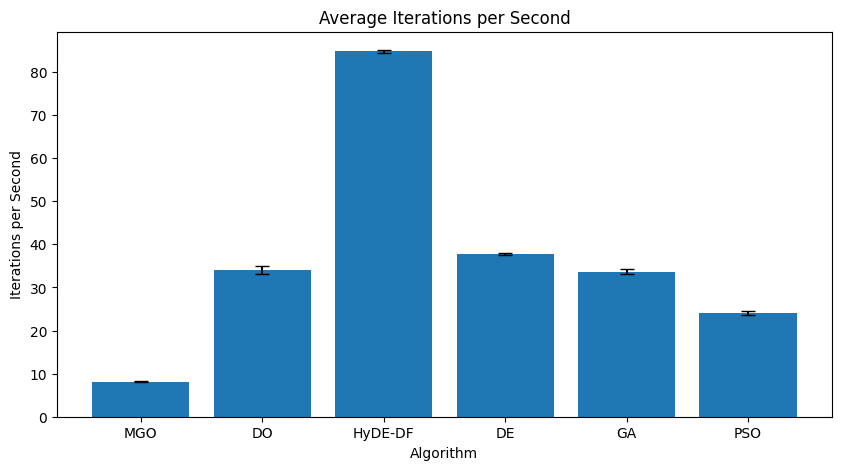

In [16]:
# Plot the iterations per second for each algorithm

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.bar(df_iterations.columns, df_iterations.loc['Mean'], yerr=df_iterations.loc['Std'], capsize=5)

ax.set_title('Average Iterations per Second')

ax.set_ylabel('Iterations per Second')

ax.set_xlabel('Algorithm')

# ax.grid()

# Save to SVG
plt.savefig('exec_times.png', dpi=300)

plt.show()

In [65]:
df_epochs.round(2)

,MGO,DO,HyDE-DF,DE,GA,PSO
0,20000.0,20000.0,20000.0,5716.00,15898.00,20000.0
1,20000.0,20000.0,20000.0,4400.00,14795.00,20000.0
2,20000.0,20000.0,20000.0,4422.00,17418.00,20000.0
3,20000.0,20000.0,20000.0,4648.00,14809.00,20000.0
4,20000.0,20000.0,20000.0,4761.00,16830.00,20000.0
5,20000.0,20000.0,20000.0,4552.00,15510.00,20000.0
6,20000.0,20000.0,20000.0,4455.00,17424.00,20000.0
7,20000.0,20000.0,20000.0,4422.00,15599.00,20000.0
8,20000.0,20000.0,20000.0,5090.00,16648.00,20000.0
9,20000.0,20000.0,20000.0,4476.00,15003.00,20000.0


In [10]:
# Build the DataFrames for an easy area visualization
# For this we'll consider the sum of each component over time

def concat_resources(data, load_data):
    
    consumptions = pd.DataFrame({}, index=['{:02d}:00'.format(i) for i in np.arange(24)])
    consumptions['Loads'] = np.sum(load_data, axis=0)
    consumptions['Generator Excess'] = data['genExcActPower'].sum().values
    consumptions['Storage Charge'] = data['storChActPower'].sum().values
    consumptions['Vehicle Charge'] = data['v2gChActPower'].sum().values
    consumptions['Exports'] = data['pExp'].values
    
    productions = pd.DataFrame({}, index=['{:02d}:00'.format(i) for i in np.arange(24)])
    productions['Generator'] =data['genActPower'].sum().values
    productions['Load Cut'] = data['loadCutActPower'].sum().values
    productions['Load Reduce'] = data['loadRedActPower'].sum().values
    productions['Energy Not Supplied'] = data['loadENS'].sum().values
    productions['Storage Discharge'] = data['storDchActPower'].sum().values
    productions['Vehicle Discharge'] = data['v2gDchActPower'].sum().values
    productions['Imports'] = data['pImp'].values
    
    return consumptions, productions

In [11]:
# Go through each algorithm

hyde_cons, hyde_prods = concat_resources(data_hydedf[min_fitness.loc['HyDE-DF']['Run'].astype(int)],
                                         parsed_data.load['p_forecast'])

mgo_cons, mgo_prods = concat_resources(data_mgo[min_fitness.loc['MGO']['Run'].astype(int)],
                                       parsed_data.load['p_forecast'])

do_cons, do_prods = concat_resources(data_do[min_fitness.loc['DO']['Run'].astype(int)],
                                     parsed_data.load['p_forecast'])

de_cons, de_prods = concat_resources(data_de[min_fitness.loc['DE']['Run'].astype(int)],
                                     parsed_data.load['p_forecast'])

ga_cons, ga_prods = concat_resources(data_ga[min_fitness.loc['GA']['Run'].astype(int)],
                                     parsed_data.load['p_forecast'])

pso_cons, pso_prods = concat_resources(data_pso[min_fitness.loc['PSO']['Run'].astype(int)],
                                       parsed_data.load['p_forecast'])

In [16]:
hyde_prods

,Generator,Load Cut,Load Reduce,Energy Not Supplied,Storage Discharge,Vehicle Discharge,Imports
00:00,0.000000,0.000000,0.011011,8.843755e-04,4.095288,0.0,8.031343
01:00,0.000000,0.000000,0.020705,3.138107e-04,4.073273,0.0,13.728462
02:00,0.000000,0.358700,0.018351,3.226197e-04,4.045182,0.0,5.411773
03:00,10.000000,0.000000,0.026556,5.403056e-04,0.022067,0.0,0.021606
04:00,0.000000,0.000000,0.005381,1.486793e-04,4.337526,0.0,5.009383
05:00,2.387851,0.000000,0.022100,1.409017e-04,4.025471,0.0,10.308791
06:00,6.097608,0.894726,0.019987,1.361759e-03,3.925401,0.0,6.532180
07:00,12.132655,0.000000,0.007909,8.110465e-05,0.015998,0.0,0.014655
08:00,18.406031,0.000000,0.013038,4.969624e-04,2.637439,0.0,0.033941
09:00,23.059362,0.000000,0.012861,2.513712e-04,0.023644,0.0,0.000000


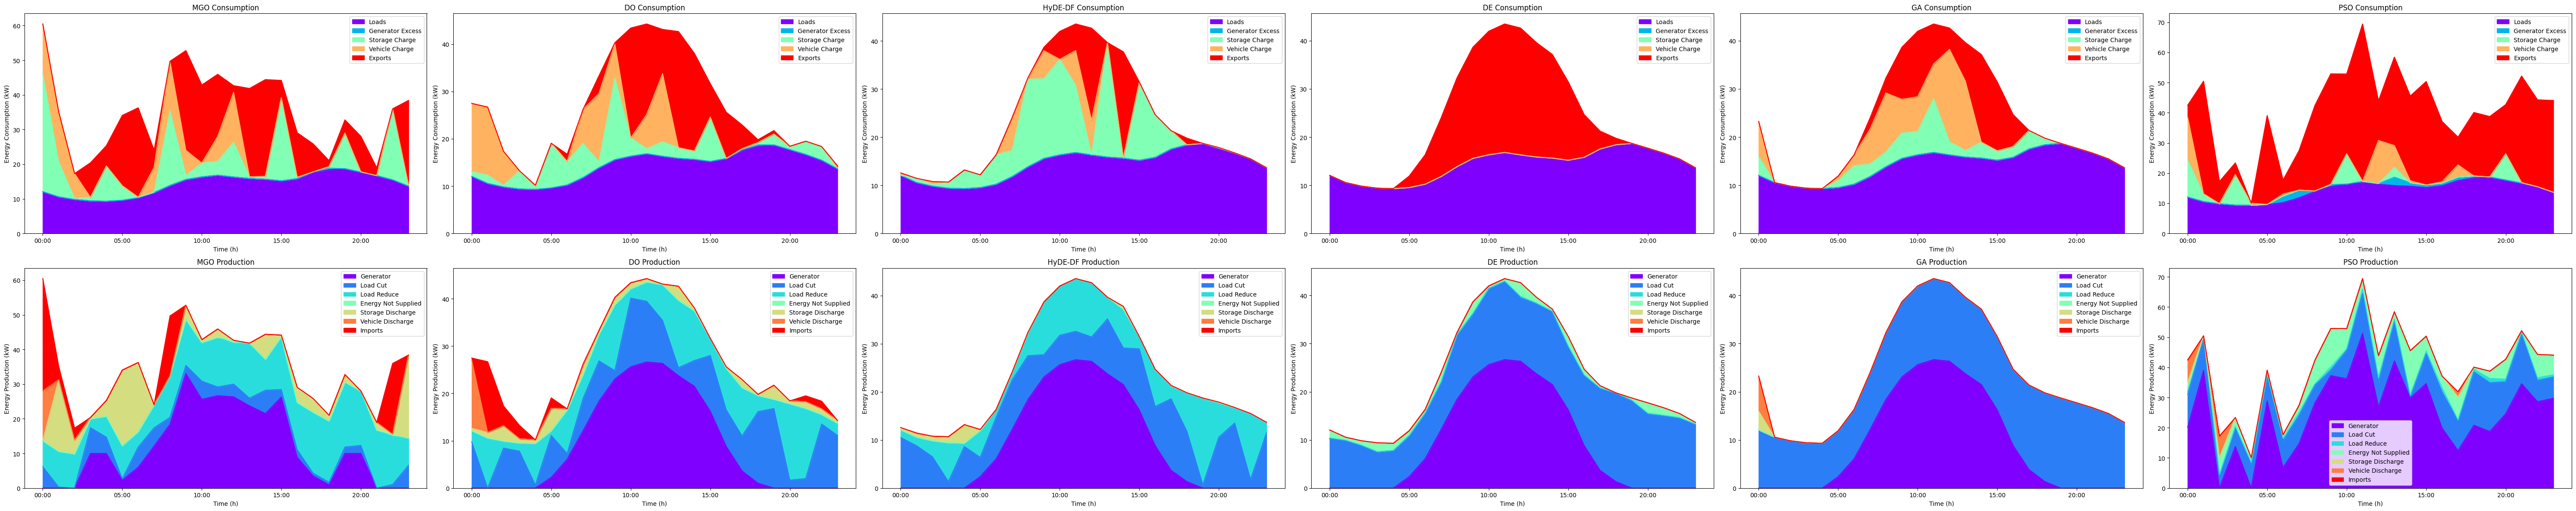

In [16]:
# Plot each algorithm

fig, axs = plt.subplots(2, 6, figsize=(60, 12))

# Top row are the consumptions
mgo_cons.plot.area(ax=axs[0, 0], cmap='rainbow')
axs[0, 0].set_title('MGO Consumption')
axs[0, 0].set_ylabel('Energy Consumption (kW)')
axs[0, 0].set_xlabel('Time (h)')

do_cons.plot.area(ax=axs[0, 1], cmap='rainbow')
axs[0, 1].set_title('DO Consumption')
axs[0, 1].set_ylabel('Energy Consumption (kW)')
axs[0, 1].set_xlabel('Time (h)')

hyde_cons.plot.area(ax=axs[0, 2], cmap='rainbow')
axs[0, 2].set_title('HyDE-DF Consumption')
axs[0, 2].set_ylabel('Energy Consumption (kW)')
axs[0, 2].set_xlabel('Time (h)')

de_cons.plot.area(ax=axs[0, 3], cmap='rainbow')
axs[0, 3].set_title('DE Consumption')
axs[0, 3].set_ylabel('Energy Consumption (kW)')
axs[0, 3].set_xlabel('Time (h)')

ga_cons.plot.area(ax=axs[0, 4], cmap='rainbow')
axs[0, 4].set_title('GA Consumption')
axs[0, 4].set_ylabel('Energy Consumption (kW)')
axs[0, 4].set_xlabel('Time (h)')

pso_cons.plot.area(ax=axs[0, 5], cmap='rainbow')
axs[0, 5].set_title('PSO Consumption')
axs[0, 5].set_ylabel('Energy Consumption (kW)')
axs[0, 5].set_xlabel('Time (h)')

# Bottom row are the productions
mgo_prods.plot.area(ax=axs[1, 0], cmap='rainbow')
axs[1, 0].set_title('MGO Production')
axs[1, 0].set_ylabel('Energy Production (kW)')
axs[1, 0].set_xlabel('Time (h)')

do_prods.plot.area(ax=axs[1, 1], cmap='rainbow')
axs[1, 1].set_title('DO Production')
axs[1, 1].set_ylabel('Energy Production (kW)')
axs[1, 1].set_xlabel('Time (h)')

hyde_prods.plot.area(ax=axs[1, 2], cmap='rainbow')
axs[1, 2].set_title('HyDE-DF Production')
axs[1, 2].set_ylabel('Energy Production (kW)')
axs[1, 2].set_xlabel('Time (h)')

de_prods.plot.area(ax=axs[1, 3], cmap='rainbow')
axs[1, 3].set_title('DE Production')
axs[1, 3].set_ylabel('Energy Production (kW)')
axs[1, 3].set_xlabel('Time (h)')

ga_prods.plot.area(ax=axs[1, 4], cmap='rainbow')
axs[1, 4].set_title('GA Production')
axs[1, 4].set_ylabel('Energy Production (kW)')
axs[1, 4].set_xlabel('Time (h)')

pso_prods.plot.area(ax=axs[1, 5], cmap='rainbow')
axs[1, 5].set_title('PSO Production')
axs[1, 5].set_ylabel('Energy Production (kW)')
axs[1, 5].set_xlabel('Time (h)')

plt.tight_layout()
plt.show()

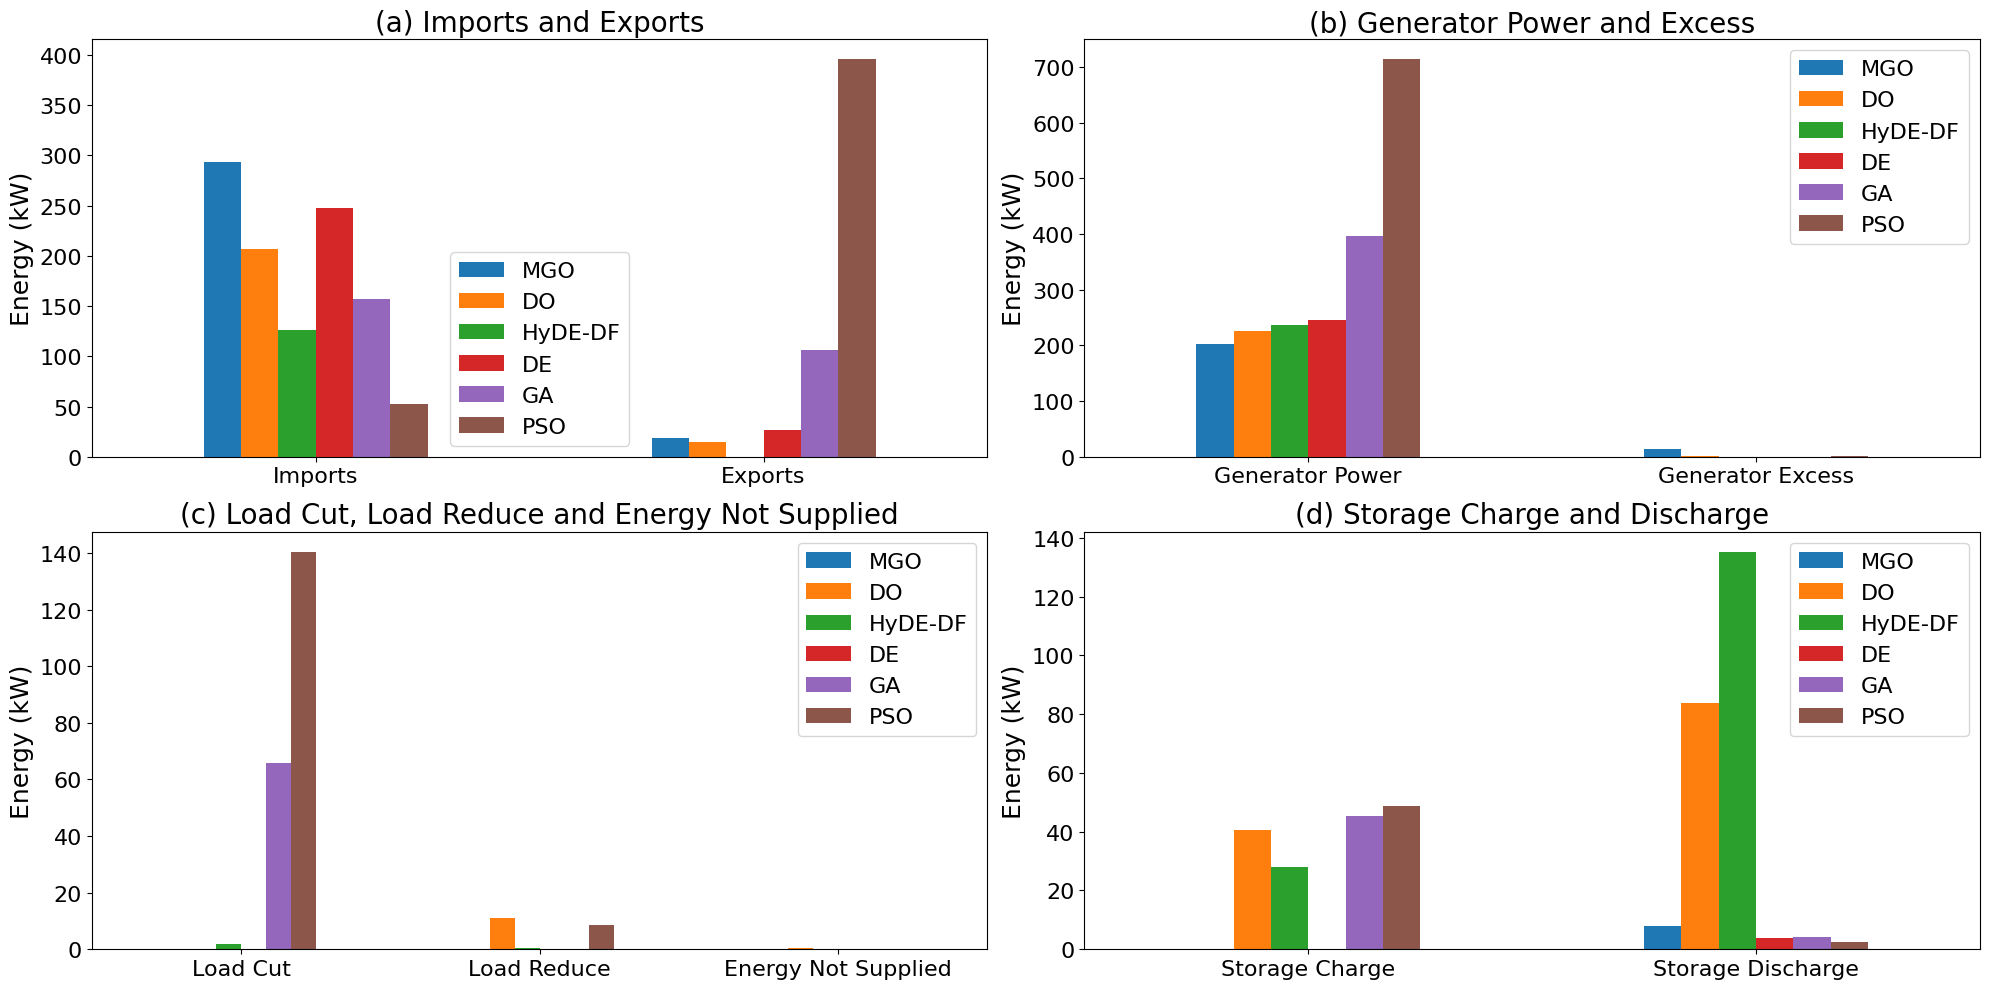

In [33]:
# 2x2 plot bar plot with all algorithms
# (0, 0) has imports and exports
# (0, 1) has generator power and generator excess
# (1, 0) has load cut, load reduce and energy not supplied
# (1, 1) has storage charge and storage discharge

fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Imports and exports
imports_exports = pd.DataFrame({}, index=['MGO', 'DO', 'HyDE-DF', 'DE', 'GA', 'PSO'])
imports_exports['Imports'] = [mgo_prods['Imports'].sum(), do_prods['Imports'].sum(), hyde_prods['Imports'].sum(),
                             de_prods['Imports'].sum(), ga_prods['Imports'].sum(), pso_prods['Imports'].sum()]

imports_exports['Exports'] = [mgo_cons['Exports'].sum(), do_cons['Exports'].sum(), hyde_cons['Exports'].sum(),
                              de_cons['Exports'].sum(), ga_cons['Exports'].sum(), pso_cons['Exports'].sum()]

imports_exports.T.plot.bar(ax=axs[0, 0])
axs[0, 0].set_title('(a) Imports and Exports')
axs[0, 0].set_ylabel('Energy (kW)')

# Rotating the x-axis labels
for tick in axs[0, 0].get_xticklabels():
    tick.set_rotation(0)
    
# Generator power and generator excess
generator = pd.DataFrame({}, index=['MGO', 'DO', 'HyDE-DF', 'DE', 'GA', 'PSO'])
generator['Generator Power'] = [mgo_prods['Generator'].sum(), do_prods['Generator'].sum(), hyde_prods['Generator'].sum(),
                                de_prods['Generator'].sum(), ga_prods['Generator'].sum(), pso_prods['Generator'].sum()]

generator['Generator Excess'] = [mgo_cons['Generator Excess'].sum(), do_cons['Generator Excess'].sum(),
                                 hyde_cons['Generator Excess'].sum(),
                                 de_cons['Generator Excess'].sum(), 
                                 ga_cons['Generator Excess'].sum(), pso_cons['Generator Excess'].sum()]

generator.T.plot.bar(ax=axs[0, 1])
axs[0, 1].set_title('(b) Generator Power and Excess')
axs[0, 1].set_ylabel('Energy (kW)')

# Rotating the x-axis labels
for tick in axs[0, 1].get_xticklabels():
    tick.set_rotation(0)
    
# Load cut, load reduce and energy not supplied
load = pd.DataFrame({}, index=['MGO', 'DO', 'HyDE-DF', 'DE', 'GA', 'PSO'])
load['Load Cut'] = [mgo_prods['Load Cut'].sum(), do_prods['Load Cut'].sum(), hyde_prods['Load Cut'].sum(),
                    de_prods['Load Cut'].sum(), ga_prods['Load Cut'].sum(), pso_prods['Load Cut'].sum()]

load['Load Reduce'] = [mgo_prods['Load Reduce'].sum(), do_prods['Load Reduce'].sum(), hyde_prods['Load Reduce'].sum(),
                       de_prods['Load Reduce'].sum(), ga_prods['Load Reduce'].sum(), pso_prods['Load Reduce'].sum()]

load['Energy Not Supplied'] = [mgo_prods['Energy Not Supplied'].sum(), do_prods['Energy Not Supplied'].sum(),
                               hyde_prods['Energy Not Supplied'].sum(), de_prods['Energy Not Supplied'].sum(),
                               ga_prods['Energy Not Supplied'].sum(), pso_prods['Energy Not Supplied'].sum()]

load.T.plot.bar(ax=axs[1, 0])
axs[1, 0].set_title('(c) Load Cut, Load Reduce and Energy Not Supplied')
axs[1, 0].set_ylabel('Energy (kW)')

# Rotating the x-axis labels
for tick in axs[1, 0].get_xticklabels():
    tick.set_rotation(0)
    
# Storage charge and storage discharge
storage = pd.DataFrame({}, index=['MGO', 'DO', 'HyDE-DF', 'DE', 'GA', 'PSO'])
storage['Storage Charge'] = [mgo_cons['Storage Charge'].sum(), do_cons['Storage Charge'].sum(), 
                             hyde_cons['Storage Charge'].sum(),
                             de_cons['Storage Charge'].sum(), ga_cons['Storage Charge'].sum(), 
                             pso_cons['Storage Charge'].sum()]

storage['Storage Discharge'] = [mgo_prods['Storage Discharge'].sum(), do_prods['Storage Discharge'].sum(),
                                hyde_prods['Storage Discharge'].sum(),
                                de_prods['Storage Discharge'].sum(), ga_prods['Storage Discharge'].sum(),
                                pso_prods['Storage Discharge'].sum()]

storage.T.plot.bar(ax=axs[1, 1])
axs[1, 1].set_title('(d) Storage Charge and Discharge')
axs[1, 1].set_ylabel('Energy (kW)')

# Rotating the x-axis labels
for tick in axs[1, 1].get_xticklabels():
    tick.set_rotation(0)

# Increase text size
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    
# Increase title size
for ax in axs.flatten():
    ax.title.set_size(20)
    
# Increase x and y labels size
for ax in axs.flatten():
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)
    
# Increase legend size
for ax in axs.flatten():
    ax.legend(fontsize=16)

plt.tight_layout()

# Save to SVG
plt.savefig('algo_solution_data.png', dpi=300)
plt.show()

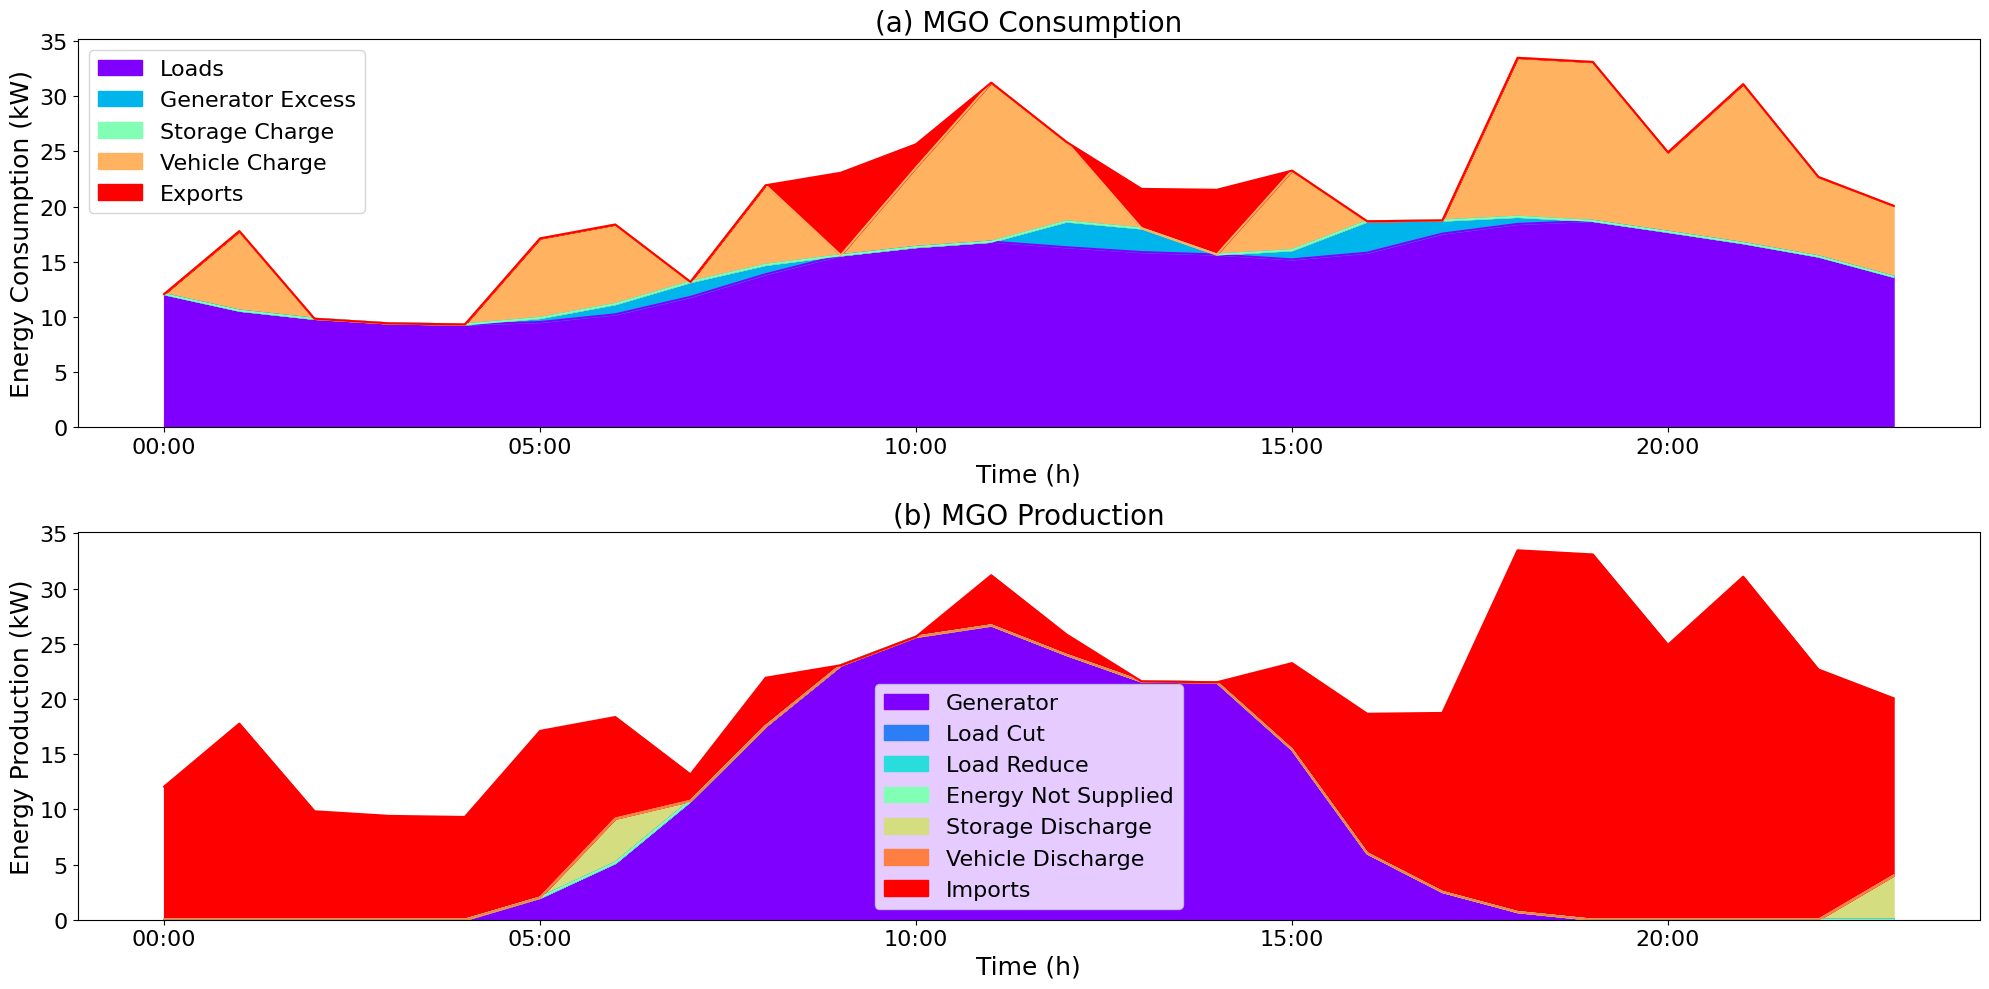

In [34]:
# Plot the MGO cons and prods

fig, axs = plt.subplots(2, 1, figsize=(20, 10))

mgo_cons.plot.area(ax=axs[0], cmap='rainbow')
axs[0].set_title('(a) MGO Consumption')
axs[0].set_ylabel('Energy Consumption (kW)')
axs[0].set_xlabel('Time (h)')

mgo_prods.plot.area(ax=axs[1], cmap='rainbow')
axs[1].set_title('(b) MGO Production')
axs[1].set_ylabel('Energy Production (kW)')
axs[1].set_xlabel('Time (h)')

# Increase text size
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)

# Increase title size
for ax in axs.flatten():
    ax.title.set_size(20)

# Increase x and y labels size
for ax in axs.flatten():
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

# Increase legend size
for ax in axs.flatten():
    ax.legend(fontsize=16)

plt.tight_layout()

plt.savefig('results_mgo.png', dpi=300)

plt.show()

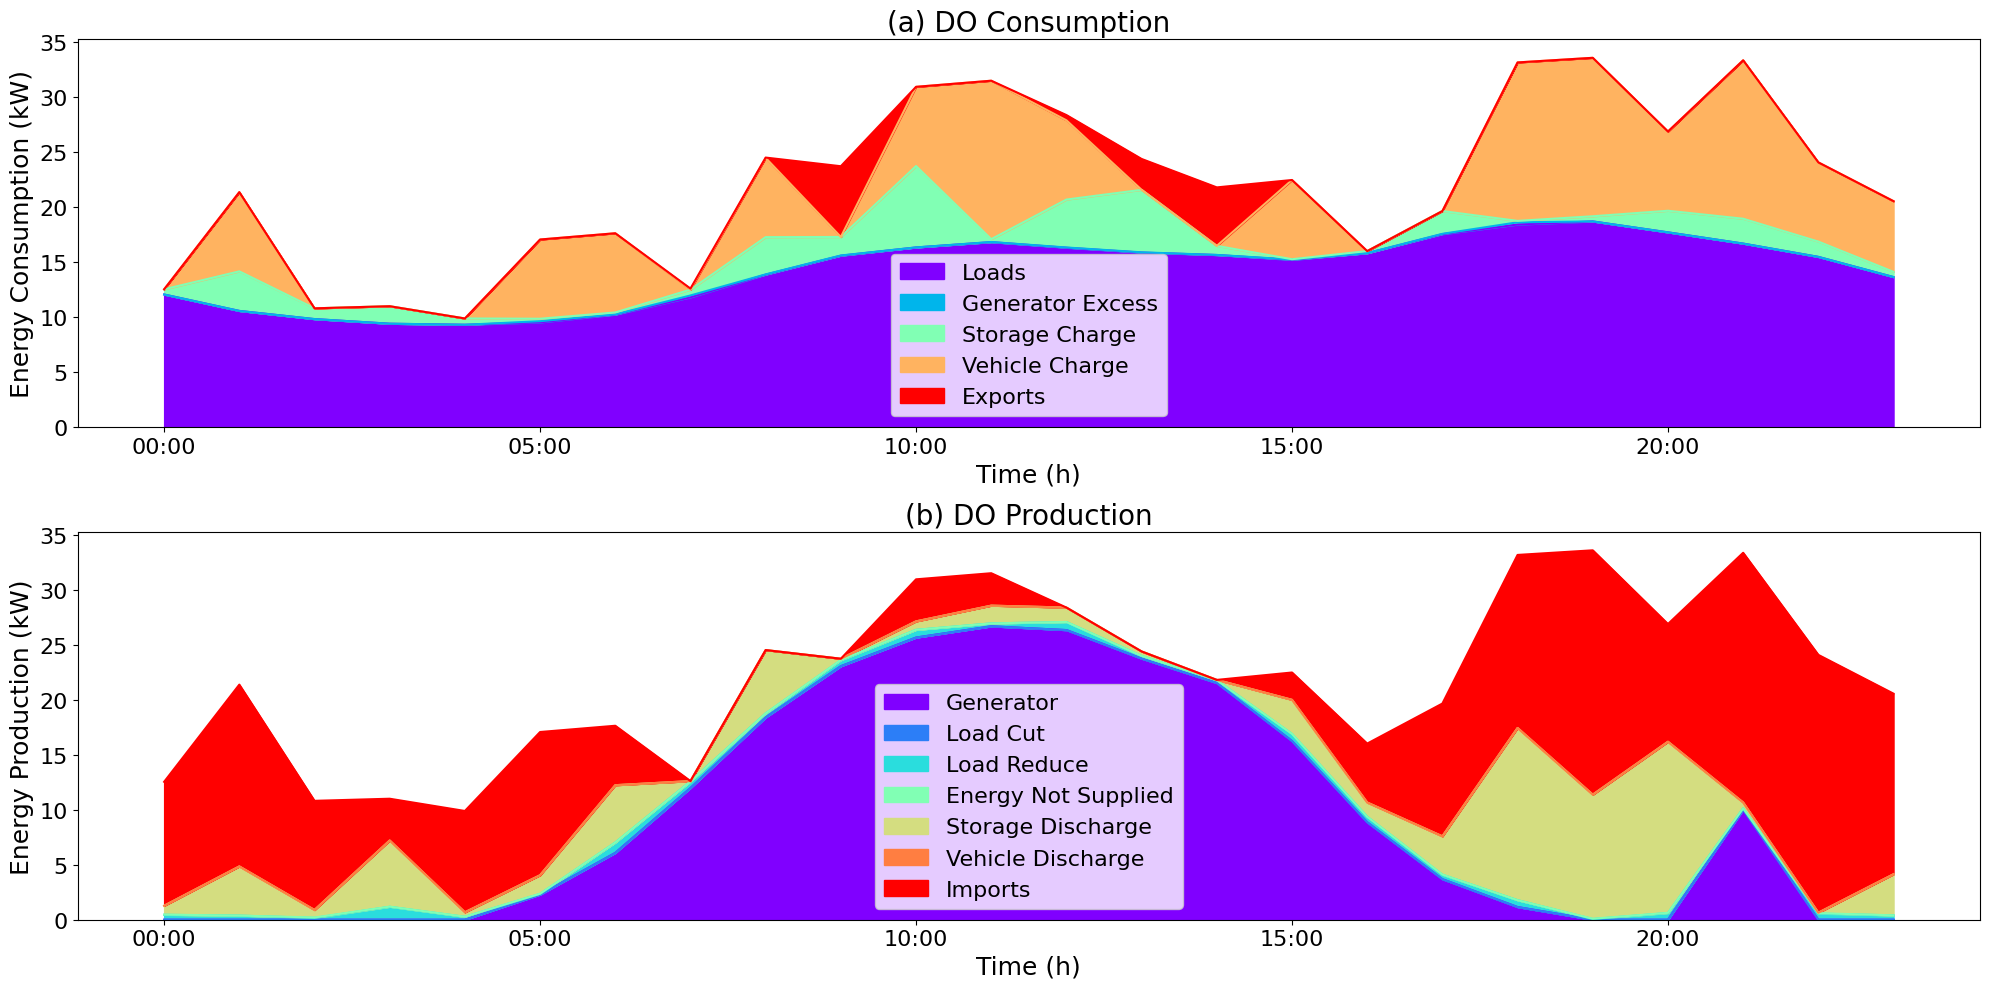

In [35]:
# Plot the DO cons and prods

fig, axs = plt.subplots(2, 1, figsize=(20, 10))

do_cons.plot.area(ax=axs[0], cmap='rainbow')
axs[0].set_title('(a) DO Consumption')
axs[0].set_ylabel('Energy Consumption (kW)')
axs[0].set_xlabel('Time (h)')

do_prods.plot.area(ax=axs[1], cmap='rainbow')
axs[1].set_title('(b) DO Production')
axs[1].set_ylabel('Energy Production (kW)')
axs[1].set_xlabel('Time (h)')

# Increase text size
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)

# Increase title size
for ax in axs.flatten():
    ax.title.set_size(20)

# Increase x and y labels size
for ax in axs.flatten():
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

# Increase legend size
for ax in axs.flatten():
    ax.legend(fontsize=16)

plt.tight_layout()

plt.savefig('results_do.png', dpi=300)

plt.show()

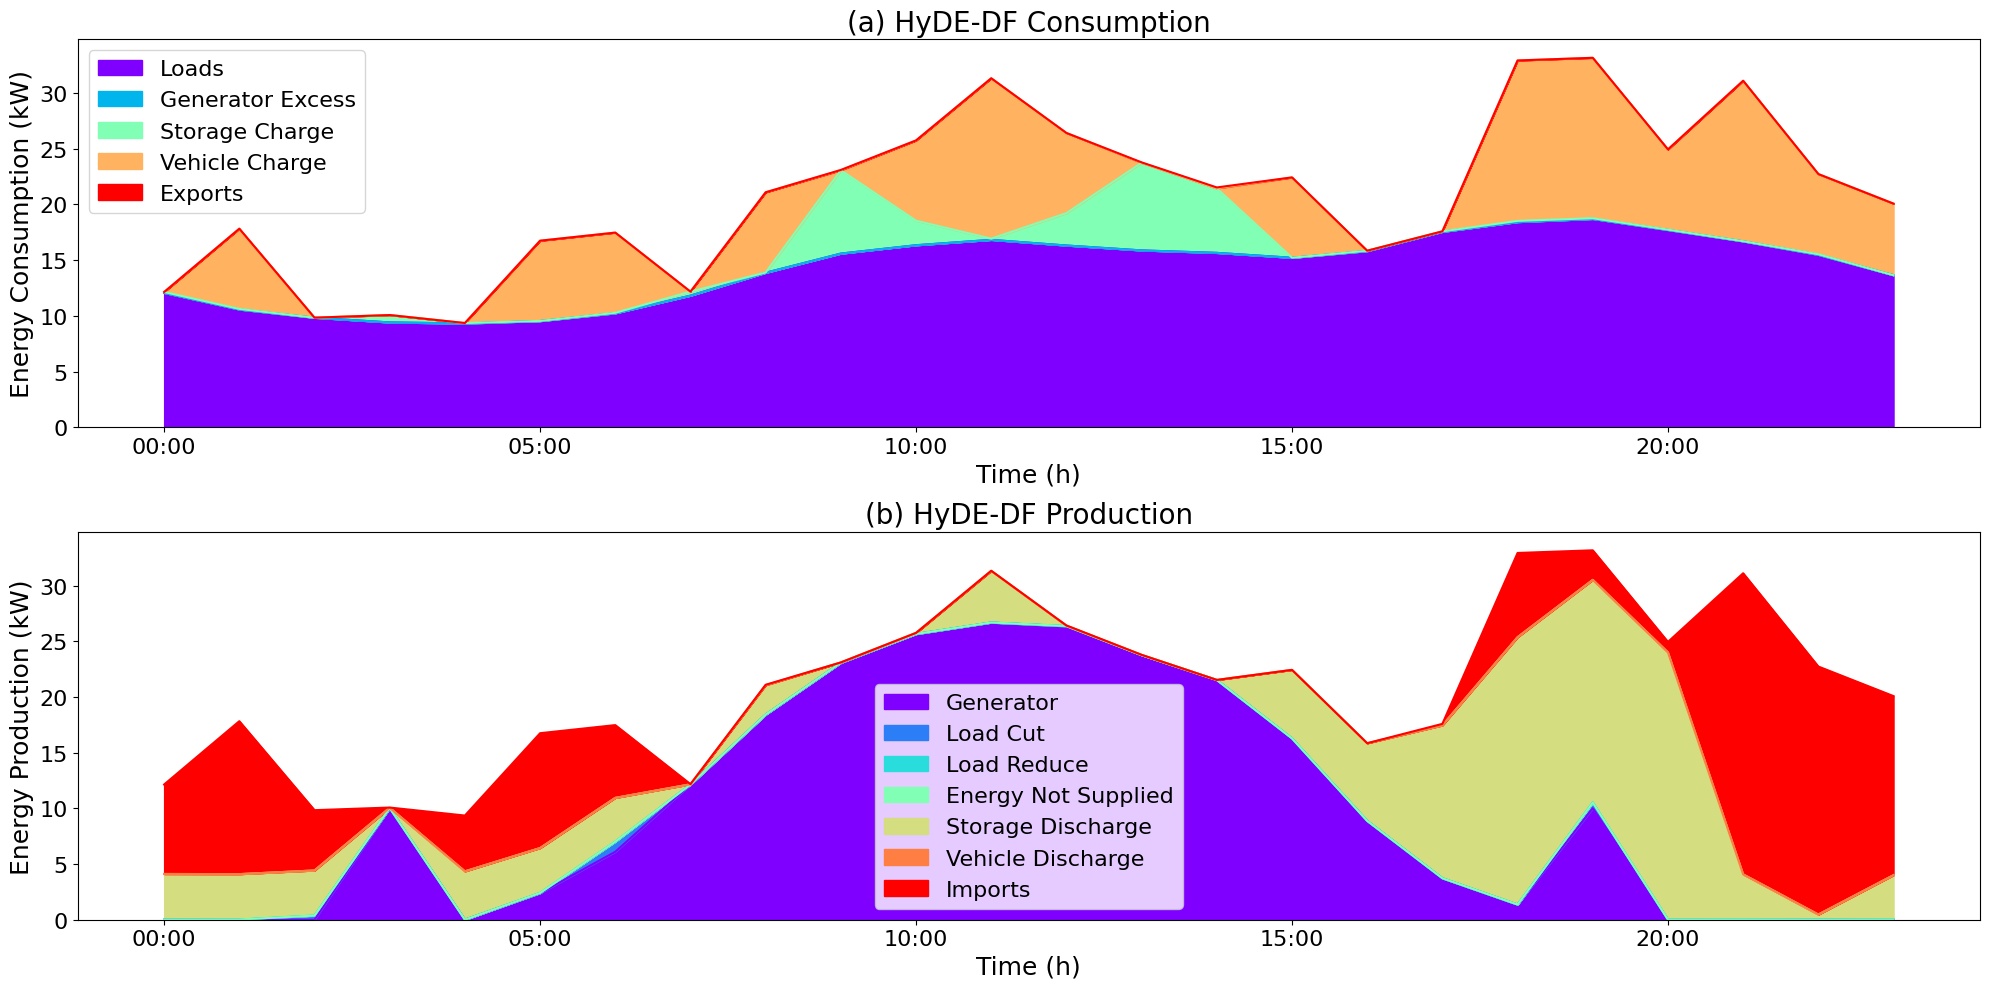

In [36]:
# Plot the HyDE-DF cons and prods

fig, axs = plt.subplots(2, 1, figsize=(20, 10))

hyde_cons.plot.area(ax=axs[0], cmap='rainbow')
axs[0].set_title('(a) HyDE-DF Consumption')
axs[0].set_ylabel('Energy Consumption (kW)')
axs[0].set_xlabel('Time (h)')

hyde_prods.plot.area(ax=axs[1], cmap='rainbow')
axs[1].set_title('(b) HyDE-DF Production')
axs[1].set_ylabel('Energy Production (kW)')
axs[1].set_xlabel('Time (h)')

# Increase text size
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)

# Increase title size
for ax in axs.flatten():
    ax.title.set_size(20)

# Increase x and y labels size
for ax in axs.flatten():
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

# Increase legend size
for ax in axs.flatten():
    ax.legend(fontsize=16)

plt.tight_layout()

plt.savefig('results_hyde.png', dpi=300)

plt.show()

In [21]:
de_prods

,Generator,Load Cut,Load Reduce,Energy Not Supplied,Storage Discharge,Vehicle Discharge,Imports
00:00,0.000010,0.0,0.000004,3.418775e-07,4.000108,0.0,8.061514
01:00,0.000009,0.0,0.000004,3.360392e-07,0.000000,0.0,17.769480
02:00,0.000135,0.0,0.000009,2.378298e-07,0.000000,0.0,9.828196
03:00,0.000017,0.0,0.000005,5.287195e-07,0.000000,0.0,9.407377
04:00,0.000017,0.0,0.000008,3.302260e-07,0.000000,0.0,9.312646
05:00,2.388318,0.0,0.000004,3.387007e-07,0.000000,0.0,14.344024
06:00,6.098246,0.0,0.000004,4.204333e-07,0.000000,0.0,11.332794
07:00,12.133273,0.0,0.000006,2.810701e-07,0.000000,0.0,0.000000
08:00,21.065574,0.0,0.000005,3.150724e-07,0.000000,0.0,0.000067
09:00,23.061517,0.0,0.000004,8.348120e-07,0.000000,0.0,0.000000


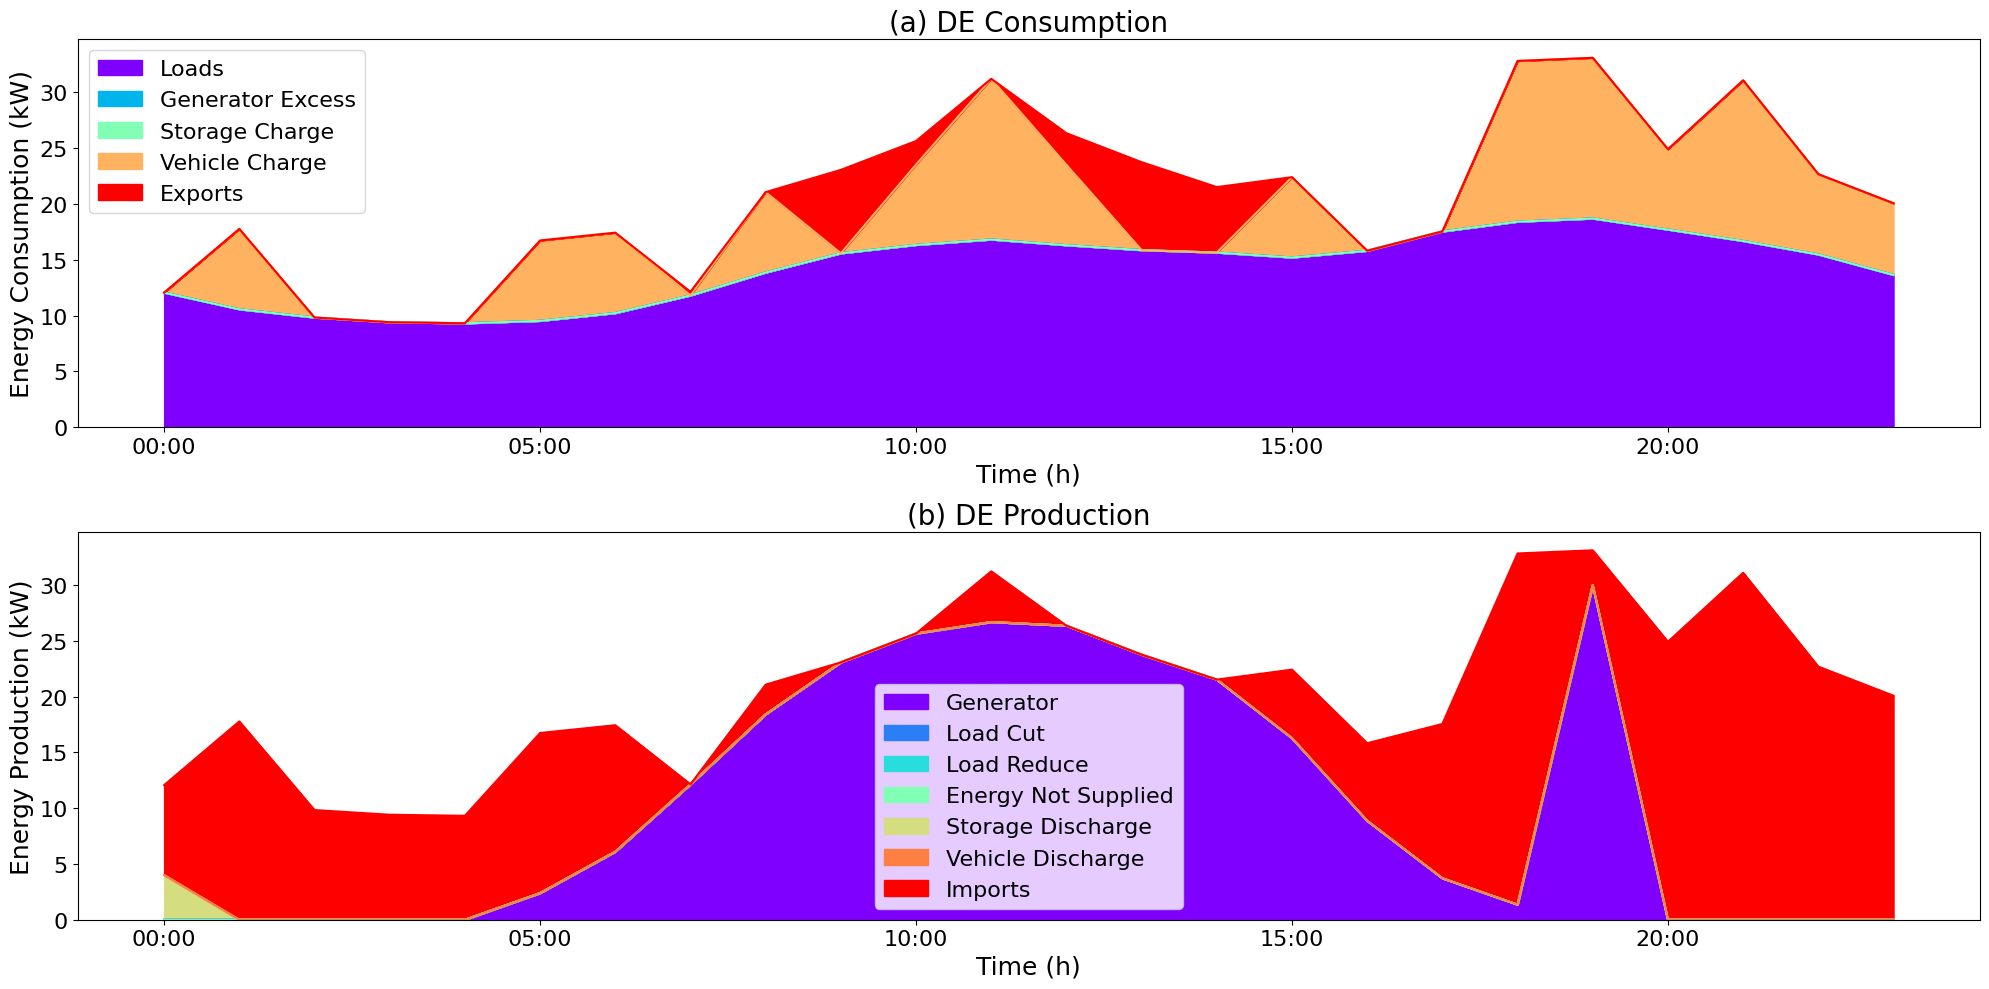

In [37]:
# Plot the DE cons and prods

fig, axs = plt.subplots(2, 1, figsize=(20, 10))

de_cons.plot.area(ax=axs[0], cmap='rainbow')
axs[0].set_title('(a) DE Consumption')
axs[0].set_ylabel('Energy Consumption (kW)')
axs[0].set_xlabel('Time (h)')

de_prods.plot.area(ax=axs[1], cmap='rainbow')
axs[1].set_title('(b) DE Production')
axs[1].set_ylabel('Energy Production (kW)')
axs[1].set_xlabel('Time (h)')

# Increase text size
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)

# Increase title size
for ax in axs.flatten():
    ax.title.set_size(20)

# Increase x and y labels size
for ax in axs.flatten():
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

# Increase legend size
for ax in axs.flatten():
    ax.legend(fontsize=16)

plt.tight_layout()

plt.savefig('results_de.png', dpi=300)

plt.show()

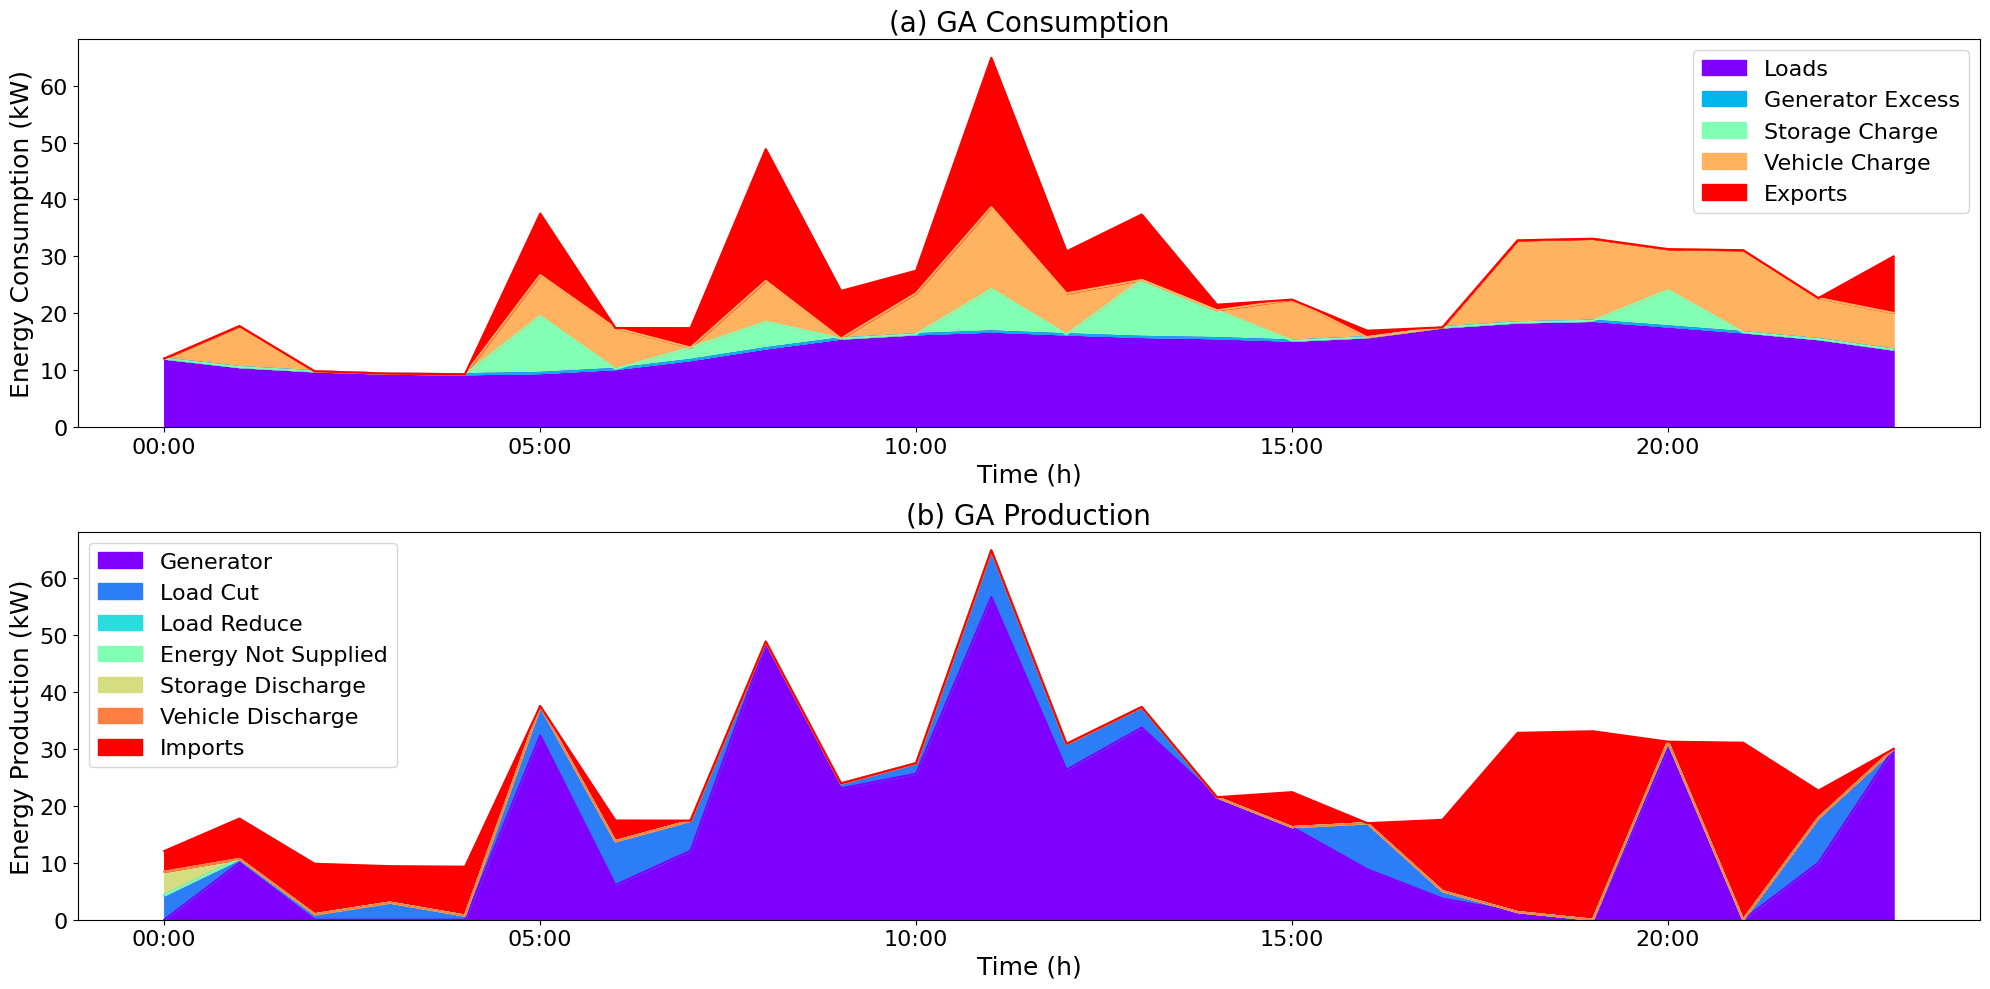

In [38]:
# Plot the GA cons and prods

fig, axs = plt.subplots(2, 1, figsize=(20, 10))

ga_cons.plot.area(ax=axs[0], cmap='rainbow')
axs[0].set_title('(a) GA Consumption')
axs[0].set_ylabel('Energy Consumption (kW)')
axs[0].set_xlabel('Time (h)')

ga_prods.plot.area(ax=axs[1], cmap='rainbow')
axs[1].set_title('(b) GA Production')
axs[1].set_ylabel('Energy Production (kW)')
axs[1].set_xlabel('Time (h)')

# Increase text size
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)

# Increase title size
for ax in axs.flatten():
    ax.title.set_size(20)

# Increase x and y labels size
for ax in axs.flatten():
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

# Increase legend size
for ax in axs.flatten():
    ax.legend(fontsize=16)

plt.tight_layout()

plt.savefig('results_ga.png', dpi=300)

plt.show()

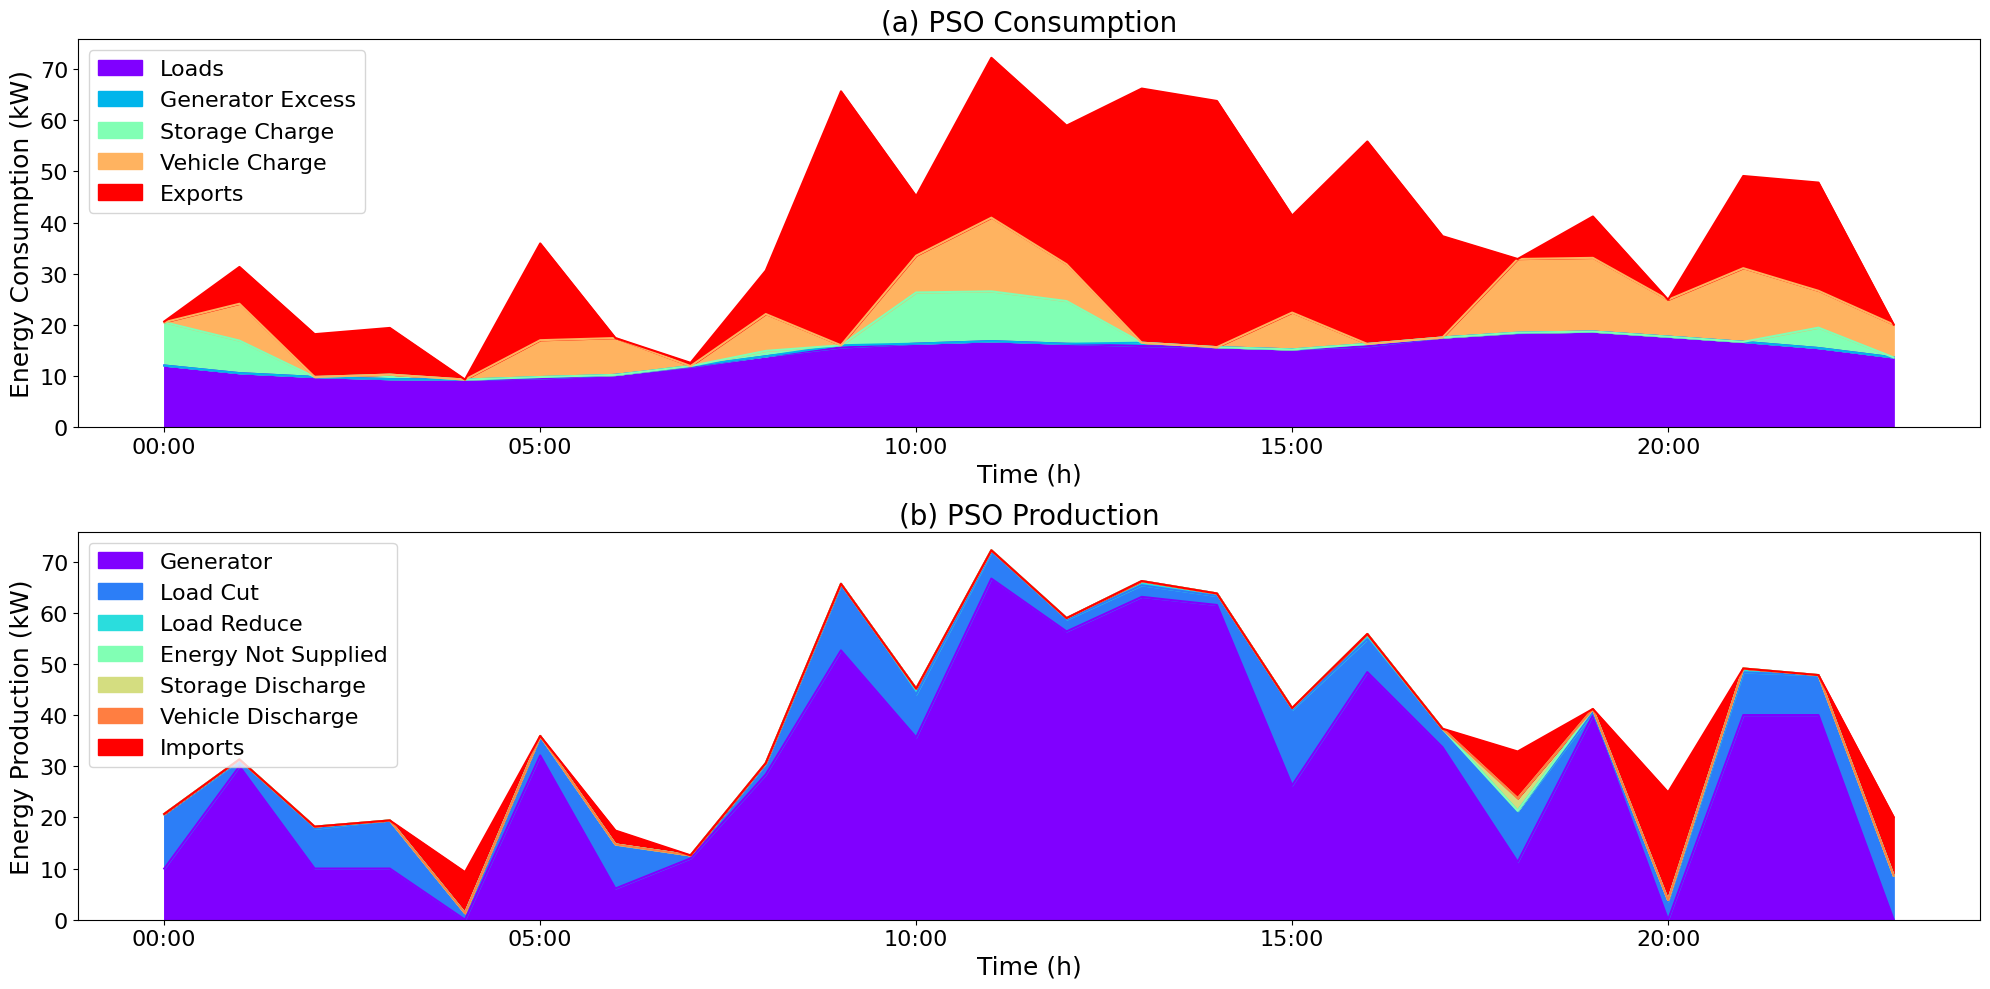

In [39]:
# Plot the PSO cons and prods

fig, axs = plt.subplots(2, 1, figsize=(20, 10))

pso_cons.plot.area(ax=axs[0], cmap='rainbow')
axs[0].set_title('(a) PSO Consumption')
axs[0].set_ylabel('Energy Consumption (kW)')
axs[0].set_xlabel('Time (h)')

pso_prods.plot.area(ax=axs[1], cmap='rainbow')
axs[1].set_title('(b) PSO Production')
axs[1].set_ylabel('Energy Production (kW)')
axs[1].set_xlabel('Time (h)')

# Increase text size
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)

# Increase title size
for ax in axs.flatten():
    ax.title.set_size(20)

# Increase x and y labels size
for ax in axs.flatten():
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

# Increase legend size
for ax in axs.flatten():
    ax.legend(fontsize=16)

plt.tight_layout()

plt.savefig('results_pso.png', dpi=300)

plt.show()